<a href="https://colab.research.google.com/github/priyachittamuru/datavisualizationsdiabetics/blob/main/Diabetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Source** : https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data
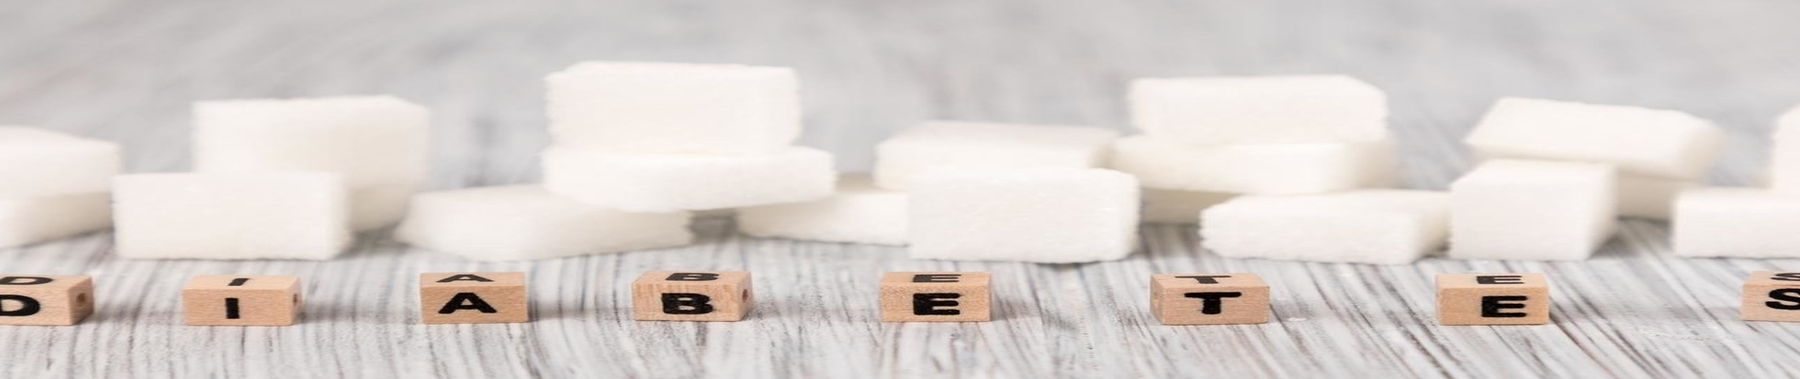
##**Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

##**Content**
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)



In [ ]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the datafile
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
#getting the summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1. There are no null values and categorial values in dataset

In [ ]:
#printing the first 5 rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




---
6. **What is the distribution of age and BMI (Body Mass Index) among diabetic patients?**


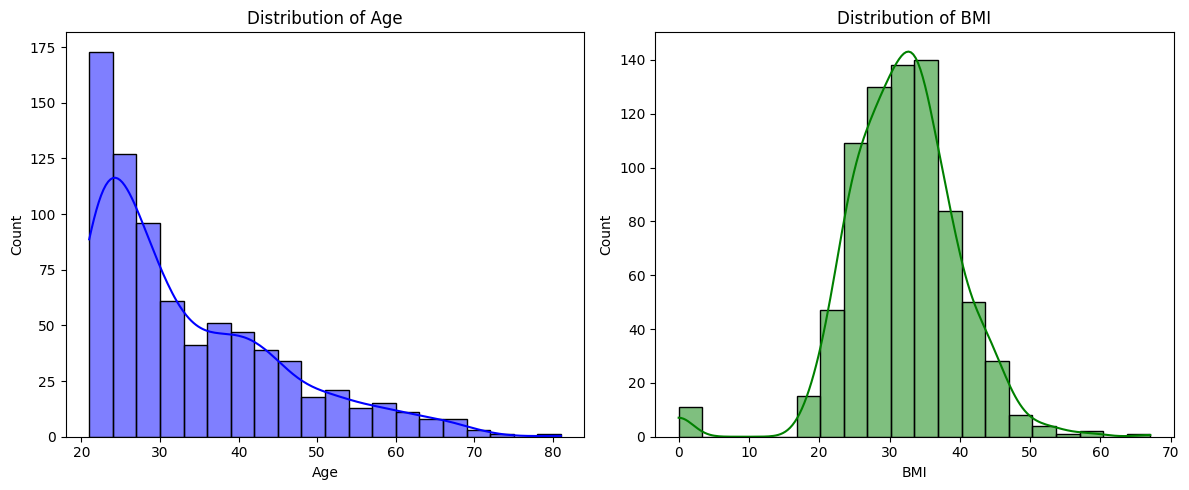

In [10]:

# Plot distribution of Age and BMI
plt.figure(figsize=(12, 5))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# BMI distribution
plt.subplot(1, 2, 2)
sns.histplot(data['BMI'], bins=20, kde=True, color='green')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')

plt.tight_layout()
plt.show()


1. The highest number of individuals are around age 20, indicating a younger population in the dataset.

2. Most individuals fall between ages 20 to 35, with the count decreasing as age increases.

3. Fewer individuals are present in age groups above 50, showing a decline in older participants.

4. The age distribution is skewed to the right, meaning most patients are younger, and fewer older individuals are present.

5. The BMI distribution appears normally distributed, peaking around 30 BMI, which suggests that most individuals fall in the overweight category.

6. There are very few individuals with extremely low or high BMI values.



---


7. **How do blood pressure levels vary across different age groups?**

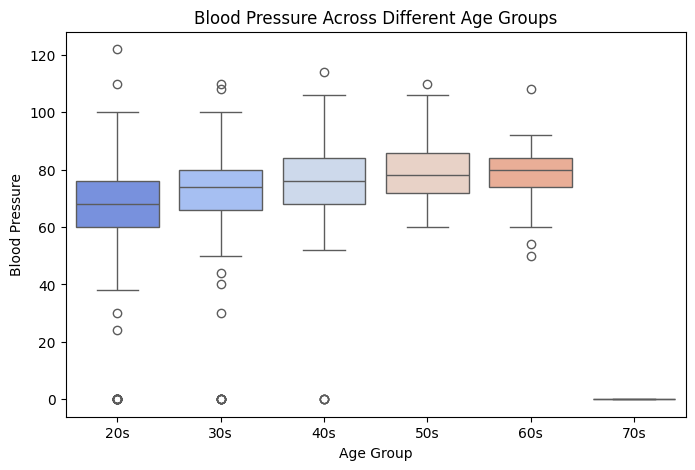

In [12]:
# Categorize Age into groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s', '30s', '40s', '50s', '60s', '70s'])

# Boxplot of Blood Pressure by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(x='AgeGroup', y='BloodPressure', data=data, palette='coolwarm')
plt.xlabel('Age Group')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure Across Different Age Groups')
plt.show()


1. Blood pressure tends to increase with age, with higher median values in the older age groups.

2. The 20s and 30s age groups have a wider range of blood pressure values, with several outliers indicating possible health variations.

3. Individuals in their 40s, 50s, and 60s have a higher median blood pressure, suggesting an age-related increase in blood pressure levels.

4. The 70s age group has very few data points, possibly due to a smaller sample size in this dataset.

5. Overall, the trend suggests a gradual increase in blood pressure with aging, which aligns with common medical findings.



---


8. **Is there a correlation between BMI and Glucose levels?**





In [14]:
# Calculate the correlation between BMI and Glucose
correlation = data['BMI'].corr(data['Glucose'])

print(f"The correlation between BMI and Glucose levels is: {correlation}")

The correlation between BMI and Glucose levels is: 0.22107106945898294


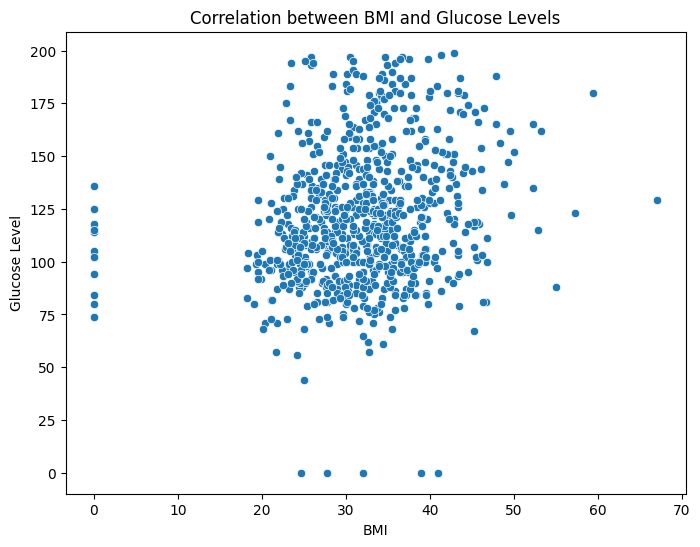

In [15]:
# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Glucose', data=data)
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.title('Correlation between BMI and Glucose Levels')
plt.show()


1. The scatter plot suggests a positive correlation between BMI and Glucose levels—as BMI increases, glucose levels also tend to be higher.

2. Most individuals have a BMI between 20 and 40 and glucose levels between 80 and 150.

3. There are some outliers with very high glucose levels (>175) and high BMI (>50), possibly indicating high-risk diabetic patients.

4. A cluster of points around BMI = 0 suggests potential missing or incorrectly recorded data.

5. The spread of data suggests that while higher BMI is generally associated with higher glucose, other factors may also influence glucose levels.



---
9. **Are there any observable patterns in the relationship between diabetes progression and patient age?**


The correlation between age and diabetes outcome is: 0.23835598302719754


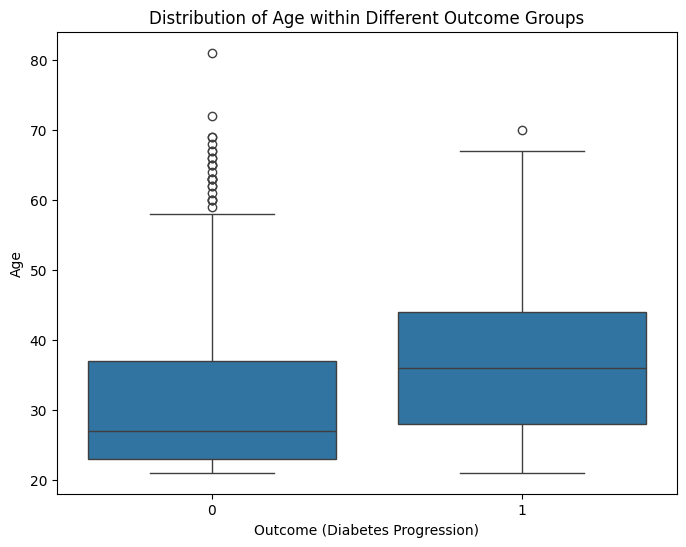

In [19]:
# Calculate the correlation between age and outcome
correlation = data['Age'].corr(data['Outcome'])
print(f"The correlation between age and diabetes outcome is: {correlation}")

# Analyze the distribution of age within different outcome groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=data)
plt.xlabel('Outcome (Diabetes Progression)')
plt.ylabel('Age')
plt.title('Distribution of Age within Different Outcome Groups')
plt.show()

1. Individuals with diabetes progression (Outcome = 1) tend to be older on average than those without diabetes.

2. The median age for diabetic individuals is higher compared to non-diabetic individuals.

3. Non-diabetic individuals (Outcome = 0) have a larger spread in younger age groups, with a significant number of outliers above 60 years.

4. Diabetic individuals (Outcome = 1) show a more even spread across middle-aged and older individuals, suggesting that age could be a factor in diabetes progression.

5. A small number of younger individuals also have diabetes, indicating that age alone is not the only factor influencing diabetes progression.



---
10. **How do insulin levels vary across different age groups?**


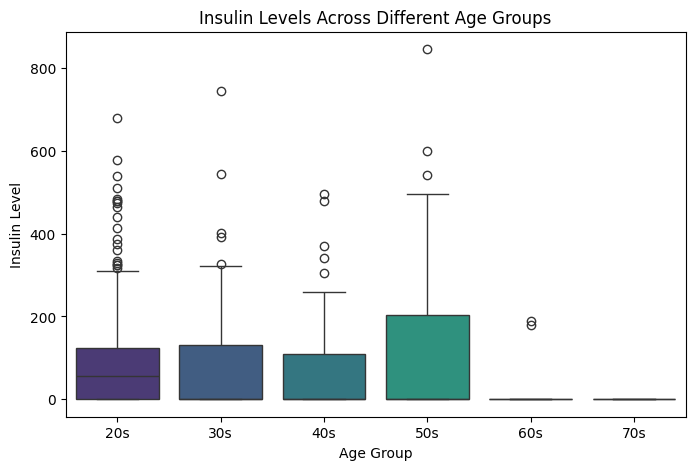

In [21]:
# Boxplot of Insulin levels across age groups
plt.figure(figsize=(8, 5))
sns.boxplot(x='AgeGroup', y='Insulin', data=data, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Insulin Level')
plt.title('Insulin Levels Across Different Age Groups')
plt.show()


1. Younger age groups (20s to 50s) have a wider range of insulin levels, with a significant number of outliers showing extremely high values.

2. The median insulin levels remain relatively stable across the 20s, 30s, and 40s, but show a slight increase in the 50s.

3. There is a sharp drop in insulin levels in the 60s and 70s age groups, suggesting a possible decrease in insulin production or different metabolic responses in older individuals.

4. The presence of many outliers in younger age groups indicates potential variations in insulin resistance or external factors like medication and lifestyle.

In [27]:
# Replace '40s' with 40 in the 'AgeGroup' column
data['AgeGroup'] = data['AgeGroup'].str.replace('40s', '40', regex=False)

# Convert the 'AgeGroup' column to numeric values
data['AgeGroup'] = pd.to_numeric(data['AgeGroup'], errors='coerce')

In [28]:
print(data['Age'].dtype)

int64


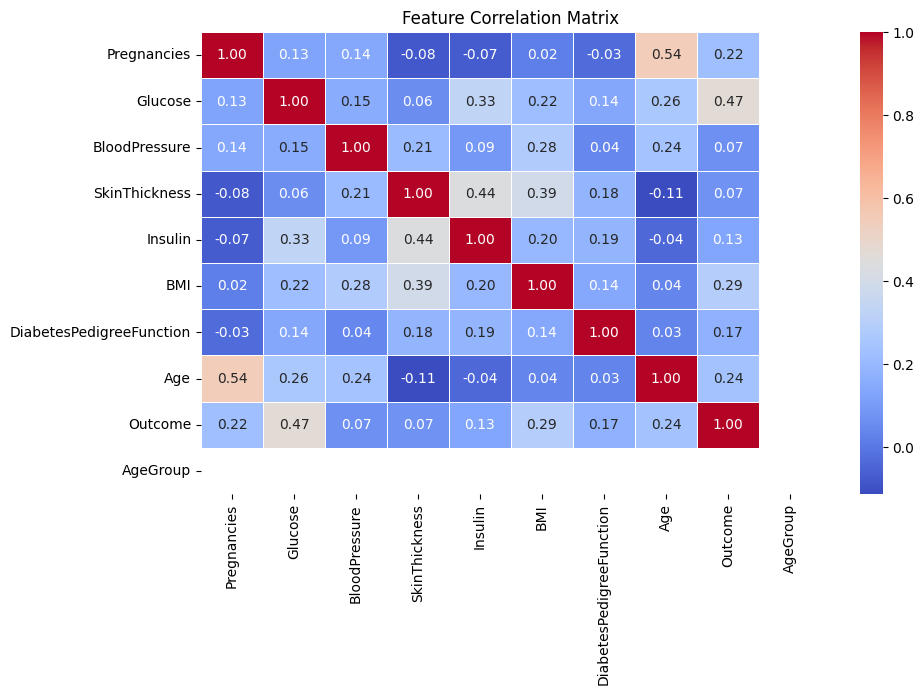

In [29]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


1. Glucose has the strongest correlation with diabetes outcome (0.47), indicating that higher glucose levels are a key factor in diabetes diagnosis.

2. BMI shows a moderate correlation (0.29) with diabetes, suggesting that obesity is a contributing factor but not the sole determinant.

3. Age and pregnancies are positively correlated (0.54), meaning older individuals tend to have more pregnancies.

4. Blood pressure, insulin, and skin thickness show weak correlations with diabetes outcome, indicating that while they may contribute, they are not the primary indicators.

5. Diabetes Pedigree Function (genetic factor) has a weak correlation (0.17) with diabetes outcome, suggesting that family history alone does not strongly predict diabetes.

To conclude glucose levels, BMI, and age are the most influential factors in diabetes prediction, while other variables show weaker relationships.